<a href="https://colab.research.google.com/github/badriadhikari/2019-Spring-DL/blob/master/course_content/module3_convnets/Transfer_Learning_VGG16_for_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using the VGG16 Convolutional Base for CIFAR-10 Dataset

### The CIFAR-10 Dataset  
* The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms  
* It is one of the most widely used datasets for machine learning research  
* The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes  
* The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks  
* There are 6,000 images of each class  

In [1]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


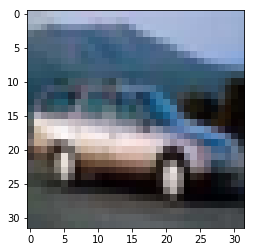

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[4])

In [4]:
from keras.utils import to_categorical
train_labels = to_categorical( y_train )
test_labels = to_categorical( y_test )
print(train_labels.shape)
print(test_labels.shape)

(50000, 10)
(10000, 10)


## Method1: Develop our own ConvNet



In [5]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add( layers.Conv2D( 16, ( 3, 3 ), activation = 'sigmoid', input_shape = x_train[0, :, :, :].shape ) )
model.add( layers.Conv2D( 4, ( 3, 3 ), activation = 'sigmoid' ) )
model.add( layers.Flatten() )
model.add( layers.Dense( 10, activation = 'softmax' ) )
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 4)         580       
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                31370     
Total params: 32,398
Trainable params: 32,398
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit( x_train, train_labels, epochs = 64, batch_size = 128, validation_data = (x_test, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/64
50000/50000 [==============================] - 5s 100us/step - loss: 1.9294 - acc: 0.3037 - val_loss: 1.7168 - val_acc: 0.3782
Epoch 2/64
50000/50000 [==============================] - 2s 49us/step - loss: 1.6597 - acc: 0.4137 - val_loss: 1.5850 - val_acc: 0.4374
Epoch 3/64
50000/50000 [==============================] - 2s 49us/step - loss: 1.5862 - acc: 0.4416 - val_loss: 1.5229 - val_acc: 0.4573
Epoch 4/64
50000/50000 [==============================] - 3s 50us/step - loss: 1.5367 - acc: 0.4577 - val_loss: 1.5397 - val_acc: 0.4571
Epoch 5/64
50000/50000 [==============================] - 2s 50us/step - loss: 1.4961 - acc: 0.4746 - val_loss: 1.5125 - val_acc: 0.4612
Epoch 6/64
50000/50000 [==============================] - 2s 50us/step - loss: 1.4693 - acc: 0.4842 - val_loss: 1.4588 - val_acc: 0.4846
Epoch 7/64
50000/50000 [==============================] - 2s 50us/step - loss: 

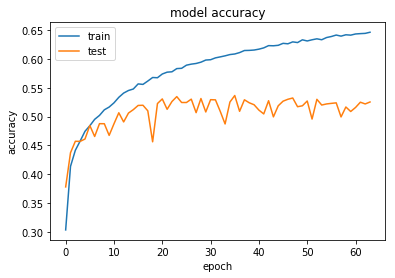

In [7]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Method2: Use the VGG16 'Convolutional Base'

In [0]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [9]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [10]:
x_test_vgg_output = conv_base.predict(x_test, verbose = 1)
x_train_vgg_output = conv_base.predict(x_train, verbose = 1)

50000/50000 [==============================] - 13s 260us/step


In [11]:
print(x_test_vgg_output.shape)
print(x_train_vgg_output.shape)

(10000, 1, 1, 512)
(50000, 1, 1, 512)


In [0]:
import numpy as np
x_test_new = np.reshape(x_test_vgg_output, (10000, 1 * 1 * 512))
x_train_new = np.reshape(x_train_vgg_output, (50000, 1 * 1 * 512))

In [13]:
print(x_test_new.shape)
print(x_train_new.shape)

(10000, 512)
(50000, 512)


In [14]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim = 1 * 1 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train_new, train_labels, epochs=64, batch_size=128, validation_data = (x_test_new, test_labels))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 50000 samples, validate on 10000 samples
Epoch 1/64
50000/50000 [==============================] - 1s 28us/step - loss: 0.6576 - acc: 0.8882 - val_loss: 0.2280 - val_acc: 0.9169
Epoch 2/64
50000/50000 [==============================] - 1s 24us/step - loss: 0.2450 - acc: 0.9140 - val_loss: 0.2067 - val_acc: 0.9230
Epoch 3/64
50000/50000 [==============================] - 1s 24us/step - loss: 0.2253 - acc: 0.9204 - val_loss: 0.2014 - val_acc: 0.9255
Epoch 4/64
50000/50000 [==============================] - 1s 24us/step - loss: 0.2167 - acc: 0.9227 - val_loss: 0.2026 - val_acc: 0.9269
Epoch 5/64
50000/50000 [==============================] - 1s 24us/step - loss: 0.2111 - acc: 0.9257 - val_loss: 0.2010 - val_acc: 0.9280
Epoch 6/64
50000/50000 [==============================] - 1s 24us/step - loss: 0.2070 - acc: 0.9272 - val_loss: 0.2015 - val_acc: 0.9279
Epoch 7/64
50

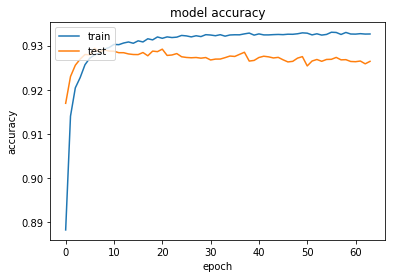

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()